In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

I have been using gradient boosting models and tuning the parameters almost at random thus far. It's about time I went and understood the method and it's parameters to achieve a better fitting model and be more confident in my final predicitions in the future. Hence I will be using the standard sklearn gradient boost model whilst following along with a tuning tutorial which can be found here:

https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

# Data preperation and understanding

In [2]:
# import the training data

df_train = pd.read_csv('train.csv')

df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# import the test data

df_test = pd.read_csv('test.csv')

df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print('The shape of the training data is: ', df_train.shape)
print('The shape of the test data is: ', df_test.shape)

The shape of the training data is:  (42000, 785)
The shape of the test data is:  (28000, 784)


There's no real need for data preperation here so I will just define the sets clearly now.

In [5]:
X_train = df_train.iloc[:,1:785]

y_train = df_train.iloc[:,0]

X_test = df_test

Let's have a look at one of the entries to better understand what's going on.

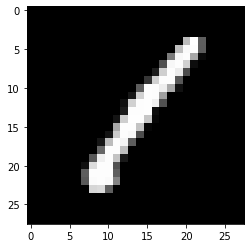

We have printed a 1


In [6]:
image = np.array(df_train.iloc[0,1:785], dtype='float')

image = image.reshape((28, 28))

plt.imshow(image, cmap='gray')

plt.show()

print('We have printed a', df_train.iloc[0,0])

# Defining and fitting the model

This is the advice that I will be following:

1. Choose a relatively high learning rate. Generally the default value of 0.1 works but somewhere between 0.05 to 0.2 should work for different problems
2. Determine the optimum number of trees for this learning rate. This should range around 40-70. Remember to choose a value on which your system can work fairly fast. 3. This is because it will be used for testing various scenarios and determining the tree parameters.
4. Tune tree-specific parameters for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.
5. Lower the learning rate and increase the estimators proportionally to get more robust models.

Tuning tree-specific parameters:

1. min_samples_split = 500 : This should be ~0.5-1% of total values. Since this is imbalanced class problem, we’ll take a small value from the range.
2. min_samples_leaf = 50 : Can be selected based on intuition. This is just used for preventing overfitting and again a small value because of imbalanced classes.
3. max_depth = 8 : Should be chosen (5-8) based on the number of observations and predictors. This has 87K rows and 49 columns so lets take 8 here.
4. max_features = ‘sqrt’ : Its a general thumb-rule to start with square root.
5. subsample = 0.8 : This is a commonly used used start value



In [7]:
# importing the required modules

from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [8]:
# conduct a grid search to find our initial n_estimators and learning rate

variable_parameters = {'n_estimators': range(20, 100, 10), 'learning_rate': [0.1]}

# define the classifier

gbc = GradientBoostingClassifier(
                      min_samples_split=400, # ~1% of total values
                      min_samples_leaf=50, # as recommended
                      max_depth=6, # 5-8 depending on dataset size
                      max_features='sqrt', # as recommended
                      subsample=0.8 # as recommended
                      )

# define the model

model = GridSearchCV(gbc, variable_parameters, scoring='accuracy', n_jobs=4, cv=5)

# fit the model to the training set

model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=6,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=400,
                                                  subsample=0.8),
             n_jobs=4,
             param_grid={'learning_rate': [0.1],
                         'n_estimators': range(20, 100, 10)},
             scoring='accuracy')

In [9]:
model.best_params_, model.best_score_

({'learning_rate': 0.1, 'n_estimators': 90}, 0.9629523809523809)

90 is a high number of trees to construct each time and so it's worth considering increasing the learning rate slightly to then lower the number of trees, but I have all the time in the world and so 90 will be fine.

From the tutorial:

The order of tuning variables should be decided carefully. You should take the variables with a higher impact on outcome first. For instance, max_depth and min_samples_split have a significant impact and we’re tuning those first.

In [10]:
# conduct a grid search to find the optimal high impact tree specific parameters

variable_parameters = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}


# define the classifier

gbc = GradientBoostingClassifier(
                      learning_rate=0.1, # as found
                      n_estimators=90, # as found
                      min_samples_leaf=50, # as recommended
                      max_features='sqrt', # as recommended
                      subsample=0.8 # as recommended
                      )

# define the model

model = GridSearchCV(gbc, variable_parameters, scoring='accuracy', n_jobs=4, cv=5)

# fit the model to the training set

model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  n_estimators=90,
                                                  subsample=0.8),
             n_jobs=4,
             param_grid={'max_depth': range(5, 16, 2),
                         'min_samples_split': range(200, 1001, 200)},
             scoring='accuracy')

In [11]:
model.best_params_, model.best_score_

({'max_depth': 15, 'min_samples_split': 200}, 0.9717142857142858)

200 is the lowest value that I chose for min_samples_split and so it's worth trying some lower values to try for some more improvement.

In [12]:
# conduct a grid search to find the optimal high impact tree specific parameters

variable_parameters = {'max_depth':range(11,15,1), 'min_samples_split':range(100,400,50)}


# define the classifier

gbc = GradientBoostingClassifier(
                      learning_rate=0.1, # as found
                      n_estimators=90, # as found
                      min_samples_leaf=50, # as recommended
                      max_features='sqrt', # as recommended
                      subsample=0.8 # as recommended
                      )

# define the model

model = GridSearchCV(gbc, variable_parameters, scoring='accuracy', n_jobs=4, cv=5)

# fit the model to the training set

model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  n_estimators=90,
                                                  subsample=0.8),
             n_jobs=4,
             param_grid={'max_depth': range(11, 15),
                         'min_samples_split': range(100, 400, 50)},
             scoring='accuracy')

In [13]:
model.best_params_, model.best_score_

({'max_depth': 11, 'min_samples_split': 200}, 0.9723095238095236)

We have 738 features and so the max_features set at sqrt is using 28. Here is the advice given:


    The number of features to consider while searching for a best split. These will be randomly selected.
    As a thumb-rule, square root of the total number of features works great but we should check upto 30-40% of the total number of features.
    Higher values can lead to over-fitting but depends on case to case.


In [14]:
# conduct a grid search to find the optimal lesser impact tree specific parameters

variable_parameters = {'max_features':range(10,150,20), 'min_samples_leaf':range(20,100,20)}


# define the classifier

gbc = GradientBoostingClassifier(
                      learning_rate=0.1, # as found
                      n_estimators=90, # as found
                      max_depth=14, # as found
                      min_samples_split=100, # as found
                      subsample=0.8 # as recommended
                      )

# define the model

model = GridSearchCV(gbc, variable_parameters, scoring='accuracy', n_jobs=4, cv=5)

# fit the model to the training set

model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=14,
                                                  min_samples_split=100,
                                                  n_estimators=90,
                                                  subsample=0.8),
             n_jobs=4,
             param_grid={'max_features': range(10, 150, 20),
                         'min_samples_leaf': range(20, 100, 20)},
             scoring='accuracy')

In [15]:
model.best_params_, model.best_score_

({'max_features': 90, 'min_samples_leaf': 60}, 0.973047619047619)

Next a nice range for subsample is recommended from 0.6-0.9.

In [18]:
# conduct a grid search to find the optimal subsample

variable_parameters = {'subsample':[0.5,0.6,0.7,0.8,0.9,1]}


# define the classifier

# we write the features strangely here since computing the optimal parameters is taking a long time and so it's nice to be able to run each block of code without waiting

gbc = GradientBoostingClassifier(
                      learning_rate=0.1, # as found
                      n_estimators=90, # as found
                      max_depth=14, # as found
                      min_samples_split=100, # as found
                      max_features=model.best_params_['max_features'], # max_features as found
                      min_samples_leaf=model.best_params_['min_samples_leaf'] # min_sample_leaf as found
                      )

# define the model

model = GridSearchCV(gbc, variable_parameters, scoring='accuracy', n_jobs=4, cv=5)

# fit the model to the training set

model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=14, max_features=90,
                                                  min_samples_leaf=60,
                                                  min_samples_split=100,
                                                  n_estimators=90),
             n_jobs=4, param_grid={'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             scoring='accuracy')

In [19]:
model.best_params_, model.best_score_

({'subsample': 0.9}, 0.9729047619047619)

Now we tune the learning rate as explained here:

Finally, we have all the parameters needed. Now, we need to lower the learning rate and increase the number of estimators proportionally. Note that these trees might not be the most optimum values but a good benchmark.

I'll try halving the learning rate while doublin the trees.

In [24]:
# define the classifier

gbc = GradientBoostingClassifier(
                      learning_rate=0.05, # as found
                      n_estimators=180, # as found
                      max_depth=14, # as found
                      min_samples_split=100, # as found
                      max_features=90, # max_features as found
                      min_samples_leaf=60, # min_sample_leaf as found
                      subsample=0.9 # as found
                      )

# cross validate the classifier to test it's score
cv = cross_validate(gbc, X_train, y_train, cv=5)

In [27]:
cv['test_score'].mean()

0.9731428571428571

This is a marked imporvement and so there's no reason not to try for more. We will again double the trees and halve the learning rate.

In [28]:
# define the classifier

gbc = GradientBoostingClassifier(
                      learning_rate=0.025, # as found
                      n_estimators=360, # as found
                      max_depth=14, # as found
                      min_samples_split=100, # as found
                      max_features=90, # max_features as found
                      min_samples_leaf=60, # min_sample_leaf as found
                      subsample=0.9 # as found
                      )

# cross validate the classifier to test it's score
cv = cross_validate(gbc, X_train, y_train, cv=5)

In [29]:
cv['test_score'].mean()

0.9738809523809524

Again we see great increases but this took a very long time to do. To alleviate some of the calculations for the next iteration, we'll make use of the warm start parameter of GBC. Again the trees are doubled and the learning rate halved.

In [ ]:
# define the classifier

gbc = GradientBoostingClassifier(
                      learning_rate=0.0125, # as found
                      n_estimators=720, # as found
                      max_depth=14, # as found
                      min_samples_split=100, # as found
                      max_features=90, # max_features as found
                      min_samples_leaf=60, # min_sample_leaf as found
                      subsample=0.9, # as found
                      warm_start=True # will use the previous runs trees
                      )

# cross validate the classifier to test it's score
cv = cross_validate(gbc, X_train, y_train, cv=5)

In [31]:
cv['test_score'].mean()

0.9744999999999999

This is a great result. Perhaps I could go even further but the computstional time is too great. Let's predict the test set.

In [33]:
# fit the classifier

gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.0125, max_depth=14, max_features=90,
                           min_samples_leaf=60, min_samples_split=100,
                           n_estimators=720, subsample=0.9, warm_start=True)

In [34]:
# predict the labels of the test set

y_test = gbc.predict(X_test)

In [35]:
# import the submission format

submission = pd.read_csv('sample_submission.csv')

# replace the sample labels with our submission labels

submission['Label'] = y_test

# creat a csv eith the results

submission.to_csv("submission.csv", index=False)